# Fitting process

### Import

In [78]:
import ROOT
import numpy as np
import time
import math
from math import exp
import matplotlib.pyplot as plt
from numpy import loadtxt
from random import choices
import random
from scipy import optimize
from scipy.optimize import fmin
from scipy.stats import poisson
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit



## Import Reference Data

In [2]:
'Import data as 2D array'
Ref_Data = loadtxt("Reference_Data_Numpy_2000_Tracks_1000_Colissions.txt");

### Set parameter

In [3]:
'Set parameter to the same values as the reference data'
N = len(Ref_Data)
Tracks = len(Ref_Data[1])
print("Number of tracks: %d" % Tracks)
print("Number of N: %d" % N)

Number of tracks: 2000
Number of N: 1000


### Check if the import worked

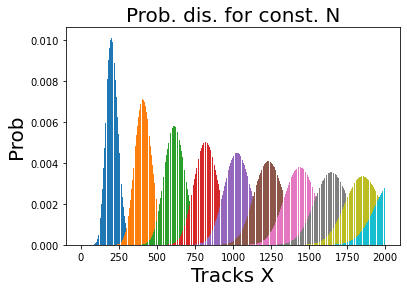

32.79354953765869 s


In [4]:
tic = time.time()
x_list = list(range(Tracks))
plt.bar(x_list,Ref_Data[round(0.1*N)-1],label = "N=" + str(round(0.1*N)))
plt.bar(x_list,Ref_Data[round(0.2*N)-1],label = "N=" + str(round(0.2*N)))
plt.bar(x_list,Ref_Data[round(0.3*N)-1],label = "N=" + str(round(0.3*N)))
plt.bar(x_list,Ref_Data[round(0.4*N)-1],label = "N=" + str(round(0.4*N)))
plt.bar(x_list,Ref_Data[round(0.5*N)-1],label = "N=" + str(round(0.5*N)))
plt.bar(x_list,Ref_Data[round(0.6*N)-1],label = "N=" + str(round(0.6*N)))
plt.bar(x_list,Ref_Data[round(0.7*N)-1],label = "N=" + str(round(0.7*N)))
plt.bar(x_list,Ref_Data[round(0.8*N)-1],label = "N=" + str(round(0.8*N)))
plt.bar(x_list,Ref_Data[round(0.9*N)-1],label = "N=" + str(round(0.9*N)))
plt.bar(x_list,Ref_Data[N-1],label = "N=" + str(N))
plt.xlabel('Tracks X',fontsize=20)
plt.ylabel('Prob',fontsize=20)
plt.title("Prob. dis. for const. N",fontsize=20) 
#plt.legend() #
plt.rcParams["figure.figsize"] = (9,9)
plt.show()
#plt.savefig("Constant_N_dis.pdf")
toc = time.time()
print(str(toc-tic)+" s")

## Create MC data

### Functions used

In [5]:
'Track pdf'
def func(x):
    Value = exp(-0.272581-1.933719*x)+exp(-2.107228-0.198227*x)
    return(Value)

'discrete Probabilities of number of tracks for N = 1'
number = []
weights = []
for i in range(Tracks):
    number.append(i)
    weights.append(func(i))
weights = np.array(weights)
weights = weights/np.sum(weights)


'Data_Eva(mu,Length) returns the simulated data'
def Data_Eva(mu,Length):
    tic = time.time()
    X = [0] * Tracks
    s = np.random.poisson(mu, Length)#random number from poisson distribution - number of pp col.
    for i in range(Length):
        a = random.choices(number, weights,k=s[i])#for each pp col. a random number of tracks corresponding to the pdf func(x)
        A = np.sum(a)
        if A < Tracks:# error prevention since len(X) = Tracks
            X[int(A)] += 1
    Data = np.array(X)
    Data = Data/np.sum(Data)
    toc = time.time()
    print("%f s" % (toc-tic))
    return(Data)

### Create data

In [115]:
'Parameters for the simulation'
Mu_Value = 200
Bunch_Crossings = 10000
'Creating "real" data'
X = Data_Eva(Mu_Value,Bunch_Crossings)

9.233866 s


### Plot Data

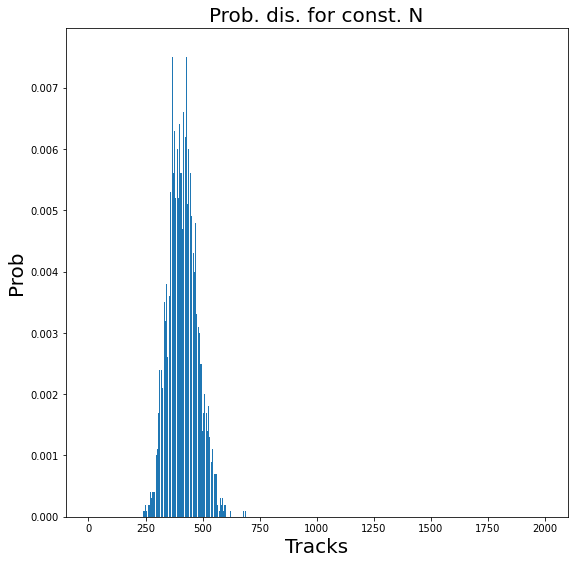

3.534677 s


In [116]:
tic = time.time()
plt.bar(list(range(Tracks)),X )
plt.xlabel('Tracks',fontsize=20)
plt.ylabel('Prob',fontsize=20)
plt.title("Prob. dis. for const. N",fontsize=20) 
plt.rcParams["figure.figsize"] = (9,9)
plt.show()
toc = time.time()
print("%f s" % (toc-tic))

## Reconstruction

### "Own" fit function

In [117]:
'Take absolute difference between data and ref data of every bin and sum up'
def Abs_diff(x,params):
    Total = [0]*Tracks
    for i in range(N):
        Import = np.array(List_reference[i])
        ThisStep = poisson.pmf(i+1,Mu_value ) * Import
        Total = np.add(Total,ThisStep)
    c=0
    for i in range(Tracks):
        c += abs(Total[i]-data[i])**2
    return(c)

'Makes sure we dont get negative mu values and uses data given above'
def Abs_diff_fit(a):
    if a<0:
        return(10)
    else:
        AbsoluteDiff = Abs_diff(a,Ref_Data,X)#use ref data and data
        return(AbsoluteDiff)

In [121]:
'calculate start value'
b=0
c=0
for i in range(Tracks):
    b += weights[i] * i
    c += X[i] *i
a = c/b
print("The start value is %f " %a)

'Used to different fit functions'
#Fit = fmin(Abs_diff_fit,np.array([a]))
#print(Fit)

The start value is 199.713942 


'Used to different fit functions'

### Fit using python functions

#### Used function

In [88]:
def List_Final_Ref_Data(List_reference,Mu_value):
    Total = [0]*Tracks
    for i in range(N):
        Import = np.array(List_reference[i])
        ThisStep = poisson.pmf(i+1,Mu_value ) * Import
        Total = np.add(Total,ThisStep)
    return(Total)

#### fit

The fit starting value is: mu = 0.009733
The fitted mu value is: 0.010025 ±  0.038223
The relative diviation for mu =[0.01002546] is: rel_div = [3.81262641]%


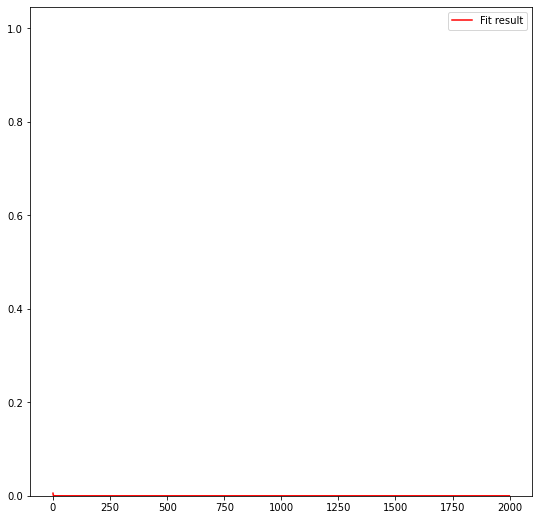

In [113]:
# get data
entries = X

# calculate bin centres
bin_middles = np.arange(Tracks)

def fit_function(k, mu):
    Array_Prob_List = List_Final_Ref_Data(Ref_Data,mu)
    Return_Array = Array_Prob_List[:len(k)]
    return Return_Array

#caluclate starting value
b=0
c=0
for i in range(Tracks):
    b += weights[i] * i
    c += X[i] *i
Starting_value = c/b 
print("The fit starting value is: mu = %f" % Starting_value)

# fit with curve_fit
parameters, cov_matrix = curve_fit(fit_function, bin_middles, entries, bounds = (0.97*Starting_value,1.03 * Starting_value))
mu = parameters
std_div = math.sqrt(cov_matrix[0])
print("The fitted mu value is: %f \u00B1 % f" % (mu, std_div))

#relative diviation
rel_div = (std_div/mu)
string_A = str(rel_div)
print('The relative diviation for mu ='+ str(mu) + ' is: rel_div = ' + string_A + '%' )

# plot with fitted parameter
x_plot = np.arange(0, Tracks)
#data
plt.bar(range(Tracks),X)
#fit
plt.plot(x_plot,fit_function(x_plot, *parameters),label='Fit result', color = "r")
plt.legend()
plt.show()